In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = 'data/hurdat2_1851_2023.txt'

cyclone_data = []
current_cyclone = None

# Function to convert latitude and longitude to float
def convert_lat_lon(value):
    if 'N' in value or 'E' in value:
        return float(value[:-1])
    elif 'S' in value or 'W' in value:
        return -float(value[:-1])

# Read the file line by line
with open(file_path, 'r') as file:
    for line in file:
        # Check if the line starts with 'AL' indicating a new cyclone
        if line.startswith('AL'):
            if current_cyclone is not None:
                cyclone_data.append(current_cyclone)
            current_cyclone = {'header': line.strip(), 'data': []}
        else:
            if current_cyclone is not None:
                current_cyclone['data'].append(line.strip().split(','))

# Append the last cyclone
if current_cyclone is not None:
    cyclone_data.append(current_cyclone)

# Process each cyclone's data
all_cyclone_dfs = []
for cyclone in cyclone_data:
    df = pd.DataFrame(cyclone['data'], columns=['Date', 'Time', 'Record', 'Status', 'Latitude', 'Longitude', 'WindSpeed', 'Pressure',
                                                'Rad_34_NE', 'Rad_34_SE', 'Rad_34_SW', 'Rad_34_NW', 'Rad_50_NE', 'Rad_50_SE',
                                                'Rad_50_SW', 'Rad_50_NW', 'Rad_64_NE', 'Rad_64_SE', 'Rad_64_SW', 'Rad_64_NW', 'maxwnd'])
    # Convert data types where necessary
    df['Date'] = df['Date'].astype(str)
    df['Time'] = df['Time'].astype(str)
    df['Latitude'] = df['Latitude'].apply(convert_lat_lon)
    df['Longitude'] = df['Longitude'].apply(convert_lat_lon)
    df['WindSpeed'] = df['WindSpeed'].astype(int)
    df['Pressure'] = df['Pressure'].astype(int)
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y%m%d %H%M')
    df.set_index('Datetime', inplace=True)
    df['Cyclone'] = cyclone['header']  # Add a column for the cyclone identifier
    all_cyclone_dfs.append(df)

# Concatenate all cyclone dataframes into a single dataframe
all_data = pd.concat(all_cyclone_dfs)

# Move the Cyclone column to the first position
columns = ['Cyclone'] + [col for col in all_data.columns if col != 'Cyclone']
all_data = all_data[columns]

# Check unique statuses in the dataset
unique_statuses = all_data['Status'].unique()
print("Unique statuses in the dataset:", unique_statuses)

# Define the latitude and longitude range for filtering
min_lat, max_lat = 10.0, 30.0
min_lon, max_lon = -90.0, -50.0

# Filter the data based on the specified latitude and longitude range
filtered_data = all_data[(all_data['Latitude'] >= min_lat) & (all_data['Latitude'] <= max_lat) &
                         (all_data['Longitude'] >= min_lon) & (all_data['Longitude'] <= max_lon)]

# Filter rows with status 'EX'
ex_data = filtered_data.loc[filtered_data['Status'] == ' LO']

# Display the first few rows of the data with status 'EX'
print(ex_data.head())


                                 Cyclone      Date   Time Record Status  \
0  AL011910,            UNNAMED,     27,  19100826   1200            TD   
1  AL011914,            UNNAMED,     19,  19140916   1800            TS   
2  AL011915,            UNNAMED,     22,  19150801   0000            TS   
3  AL011926,            UNNAMED,     47,  19260728   0000            HU   
4  AL011928,            UNNAMED,     46,  19280808   1200            HU   

   Latitude  Longitude  WindSpeed  Pressure Rad_34_NE  ... Rad_34_NW  \
0      27.5      -79.0         30      -999      -999  ...      -999   
1      29.1      -79.2         55      -999      -999  ...      -999   
2      27.9      -79.2         55      -999      -999  ...      -999   
3      27.7      -80.0         90      -999      -999  ...      -999   
4      27.6      -80.5         70      -999      -999  ...      -999   

  Rad_50_NE Rad_50_SE Rad_50_SW Rad_50_NW Rad_64_NE Rad_64_SE Rad_64_SW  \
0      -999      -999      -999      -999

/var/folders/hz/sg34vg_92b77c_hdxw3wkl400000gn/T/ipykernel_15911/2233059429.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['StatusPriority'] = filtered_data['Status'].map(priority_order).fillna(4)
/var/folders/hz/sg34vg_92b77c_hdxw3wkl400000gn/T/ipykernel_15911/2233059429.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.sort_values(by=['Cyclone', 'StatusPriority'], inplace=True)


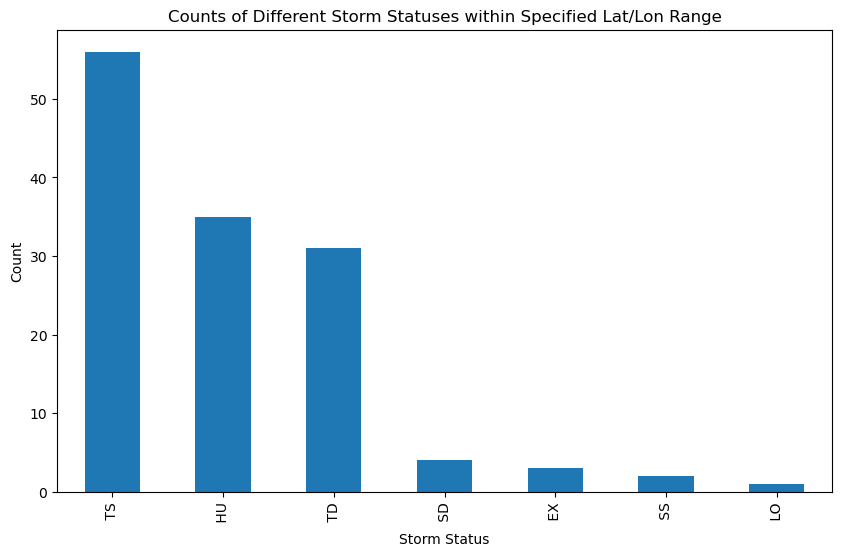

Number of unique cyclones in the filtered data: 132


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = '../data/hurdat2_1851_2023.txt'

# Initialize variables
cyclone_data = []
current_cyclone = None

# Function to convert latitude and longitude to float
def convert_lat_lon(value):
    if 'N' in value or 'E' in value:
        return float(value[:-1])
    elif 'S' in value or 'W' in value:
        return -float(value[:-1])

# Read the file line by line
with open(file_path, 'r') as file:
    for line in file:
        # Check if the line starts with 'AL' indicating a new cyclone
        if line.startswith('AL'):
            if current_cyclone is not None:
                cyclone_data.append(current_cyclone)
            current_cyclone = {'header': line.strip(), 'data': []}
        else:
            if current_cyclone is not None:
                current_cyclone['data'].append(line.strip().split(','))

# Append the last cyclone
if current_cyclone is not None:
    cyclone_data.append(current_cyclone)

# Process each cyclone's data
all_cyclone_dfs = []
for cyclone in cyclone_data:
    df = pd.DataFrame(cyclone['data'], columns=['Date', 'Time', 'Record', 'Status', 'Latitude', 'Longitude', 'WindSpeed', 'Pressure',
                                                'Rad_34_NE', 'Rad_34_SE', 'Rad_34_SW', 'Rad_34_NW', 'Rad_50_NE', 'Rad_50_SE',
                                                'Rad_50_SW', 'Rad_50_NW', 'Rad_64_NE', 'Rad_64_SE', 'Rad_64_SW', 'Rad_64_NW', 'maxwnd'])
    # Convert data types where necessary
    df['Date'] = df['Date'].astype(str)
    df['Time'] = df['Time'].astype(str)
    df['Latitude'] = df['Latitude'].apply(convert_lat_lon)
    df['Longitude'] = df['Longitude'].apply(convert_lat_lon)
    df['WindSpeed'] = df['WindSpeed'].astype(int)
    df['Pressure'] = df['Pressure'].astype(int)
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y%m%d %H%M')
    df.set_index('Datetime', inplace=True)
    df['Cyclone'] = cyclone['header']  # Add a column for the cyclone identifier
    all_cyclone_dfs.append(df)

# Concatenate all cyclone dataframes into a single dataframe
all_data = pd.concat(all_cyclone_dfs)

# Move the Cyclone column to the first position
columns = ['Cyclone'] + [col for col in all_data.columns if col != 'Cyclone']
all_data = all_data[columns]

# Define the latitude and longitude range for filtering
min_lat, max_lat = 27.5, 29.4
min_lon, max_lon = -81.5, -78.8

# Filter the data based on the specified latitude and longitude range
filtered_data = all_data[(all_data['Latitude'] >= min_lat) & (all_data['Latitude'] <= max_lat) &
                         (all_data['Longitude'] >= min_lon) & (all_data['Longitude'] <= max_lon)]

# Define the priority order for statuses
priority_order = {'HU': 1, 'TS': 2, 'TD': 3}
filtered_data['StatusPriority'] = filtered_data['Status'].map(priority_order).fillna(4)

# Sort by Cyclone and StatusPriority
filtered_data.sort_values(by=['Cyclone', 'StatusPriority'], inplace=True)

# Extract the first entry for each cyclone based on priority
unique_statuses = filtered_data.groupby('Cyclone').first().reset_index()

# Drop the StatusPriority column as it is no longer needed
unique_statuses.drop(columns=['StatusPriority'], inplace=True)

# Display the first few rows of the filtered data
print(unique_statuses.head())

# Perform value counts on the 'Status' column within the filtered data
status_counts = unique_statuses['Status'].value_counts()
print(status_counts)

# Plot the value counts
status_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of Different Storm Statuses within Specified Lat/Lon Range')
plt.xlabel('Storm Status')
plt.ylabel('Count')
plt.show()

# Optionally, if you want to count the number of unique cyclones in the filtered data
unique_cyclones = unique_statuses['Cyclone'].nunique()
print(f"Number of unique cyclones in the filtered data: {unique_cyclones}")


In [ ]:
all_data

In [55]:
new_test = all_data

In [56]:
new_test['Month'] = new_test.index.month

In [57]:
cyclones_per_year = new_test.groupby('Month')['Cyclone'].nunique()
cyclones_per_year

Month
1       7
2       1
3       1
4       6
5      41
6     146
7     200
8     505
9     811
10    482
11    137
12     27
Name: Cyclone, dtype: int64

In [58]:
import numpy as np
import seaborn as sns

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=cyclones_per_year.index, y=cyclones_per_year)

In [ ]:
filtered_data

In [59]:
aoi_months = filtered_data

In [60]:
aoi_months['Month'] = aoi_months.index.month

/var/folders/hz/sg34vg_92b77c_hdxw3wkl400000gn/T/ipykernel_15911/1425907753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aoi_months['Month'] = aoi_months.index.month


In [64]:
aoi_months = aoi_months.groupby('Month')['Cyclone'].nunique()

In [ ]:
all_months = pd.Series(0, index=np.arange(new_test['Month'].min(), new_test['Month'].max() + 1))


In [ ]:
aoi_months = aoi_months.reindex(all_months.index, fill_value=0)

In [63]:
aoi_months.index

DatetimeIndex(['1910-08-26 12:00:00', '1910-08-26 18:00:00',
               '1914-09-16 18:00:00', '1915-08-01 00:00:00',
               '1915-08-01 06:00:00', '1915-08-01 12:00:00',
               '1915-08-01 18:00:00', '1915-08-02 00:00:00',
               '1926-07-28 00:00:00', '1926-07-28 06:00:00',
               ...
               '1975-10-25 00:00:00', '1975-10-25 06:00:00',
               '2005-10-05 12:00:00', '1969-10-03 06:00:00',
               '1969-10-03 12:00:00', '1969-10-03 18:00:00',
               '1969-10-04 00:00:00', '1969-10-04 06:00:00',
               '1969-10-04 12:00:00', '2005-10-24 18:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=271, freq=None)

In [ ]:
cyclones_per_month = cyclones_per_year.reindex(all_years.index, fill_value=0)

In [91]:
aoi_months.index = ['May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December']

Text(12, 2, 'Highest Threat is Aug to Oct')

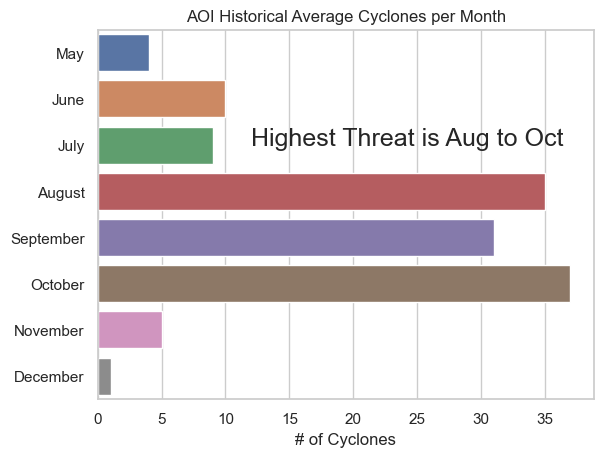

In [128]:
fig, ax = plt.subplots()
sns.set_theme(style='whitegrid')
sns.barplot(x=aoi_months, y=aoi_months.index)
ax.set_title('AOI Historical Average Cyclones per Month')
ax.set_xlabel('# of Cyclones')
ax.text(12, 2, 'Highest Threat is Aug to Oct', fontsize=18)

In [111]:
aoi_months

May           4
June         10
July          9
August       35
September    31
October      37
November      5
December      1
Name: Cyclone, dtype: int64

In [ ]:
all_months = pd.Series(0, index=np.arange(new_test['Month'].min(), new_test['Month'].max() + 1))


In [ ]:
cyclones_per_month = cyclones_per_year.reindex(all_years.index, fill_value=0)

In [ ]:
unique_statuses.loc[unique_statuses['Status'] == 'TD']